# Text Clustering

A Machine Learning project has a series of well known steps:
    - Define the problem
    - Load data
    - Evaluate Algorithms
    - Make Predictions

## 1. Defining the problem

Given an unlabeled dataset, the task is to find clusters among the dataset and predict the placement of a new unseen data in the clusters.

### Setting up the Python libraries

In [12]:
import nltk
import re
import string
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer

stopwords = nltk.corpus.stopwords.words('english')

## 2. Loading Data

___[Excath_unlabelled.txt](https://github.com/Pikakshi/Advanced_NLP_with_ML/blob/master/Datasets/ExCath_unlabelled.txt) is a sample of a dataset that is currently being used for conducting Text Analytics in the [VISTA-AR project](https://www.vista-ar.eu/en/). This dataset is a sample of a collection of tourist reviews that have been collected from TripAdvisor for analysis of tourist experience at Exeter Cathedral.___

- It contains text lines with no labels.

In [23]:
with open("/Datasets/ExCath_unlabelled.txt", "r", encoding='utf8') as text_file:
    corpus = text_file.read().split('\n')

### Text Preprocessing

In [24]:
def preprocessing(line):
    line = line.lower()
    line = re.sub(r"[{}]".format(string.punctuation), " ", line)
    return line

For details on text preprocessing, please refer to [this](https://github.com/Pikakshi/NLP_Introduction/blob/master/TextPreprocessing.ipynb) notebook.

### Feature Generation: use of Tf-Idf Vectors

In [25]:
import pandas as pd
vec = TfidfVectorizer(preprocessor = preprocessing, stop_words='english')
matrix = vec.fit_transform(corpus)
number_of_clusters = 3 #variable to specify number of clusters

#idf_df  = pd.DataFrame(matrix.toarray(), columns=vec.get_feature_names())

## 3. Building and Evaluating Model

In [ ]:
km=KMeans(n_clusters=number_of_clusters, random_state = 0).fit(matrix)

In [26]:
#top terms in every cluster
print("Top terms per cluster:")
order_centroids = km.cluster_centers_.argsort()[:, ::-1]
terms = vec.get_feature_names()
for i in range(number_of_clusters):
    top_ten_words = [terms[ind] for ind in order_centroids[i, :15]]
    print("Cluster {}: {}".format(i, ' '.join(top_ten_words)))

Top terms per cluster:
Cluster 0: cathedral shop good beautiful priced price entry building reasonably visit guides cafe helpful lady expensive
Cluster 1: staff entrance cathedral fee friendly welcoming expensive 50 exeter steep church cost nice quite courteous
Cluster 2: guide tour knowledgeable informative hour cathedral knowledge female spoke volunteer lots guided interesting overwhelming dispensed


## 4. Using model for predictions on new data

In [27]:
lines_for_predicting = ["cathedral is really beautiful!", "we had a great trip to exeter"]
km.predict(vec.transform(lines_for_predicting))

array([0, 0])

In [28]:
km.labels_

array([0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 2, 2, 1, 0, 0, 2, 0, 2, 1, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 1, 0, 1, 0, 2, 2, 0,
       2, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0])

In [29]:
results = pd.DataFrame()
results['text'] = corpus
results['category'] = km.labels_
results

,text,category
0,Catherdral shop very reasonable for gifts.,0
1,The cathedral charges an entrance fee which is...,1
2,Ticket price was a bit expensive at £7.50 per ...,0
3,Visit to the cathedral cost £7.50 entrance fee...,1
4,Nice church but too expensive for the entrance.,1
5,"Very nice cathedral, a little expensive entran...",1
6,"The Cathedral does charge to enter, however it...",1
7,The most beautiful building I've ever seen. Ve...,0
8,The entry cost is £6 per senior or £7-50 per a...,0
9,For me £7.50 seemed a steep entrance fee just ...,1


### Visualising the Clusters using PCA

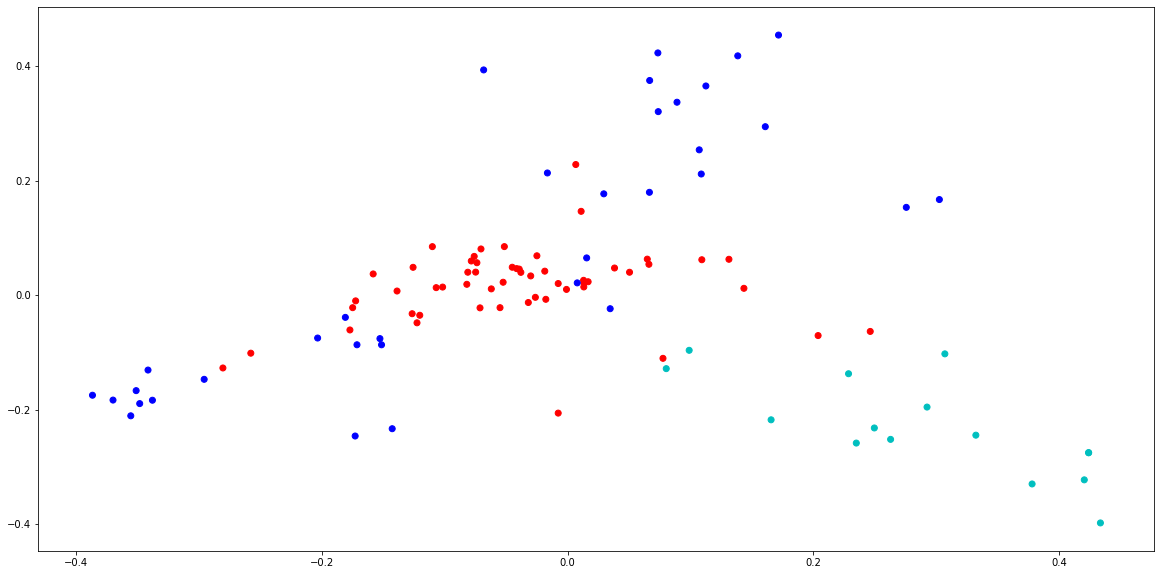

In [30]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt 
kmean_indices = km.fit_predict(matrix)

pca = PCA(n_components=2)
scatter_plot_points = pca.fit_transform(matrix.toarray())

colors = ["r", "b", "c", "y", "m" ]

x_axis = [o[0] for o in scatter_plot_points]
y_axis = [o[1] for o in scatter_plot_points]
fig, ax = plt.subplots(figsize=(20,10))

ax.scatter(x_axis, y_axis, c=[colors[d] for d in kmean_indices])
